### Visualize W&B results

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import wandb
wandb.login()

wandb: Currently logged in as: simonkral99 (uni-ma) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

In [2]:
api = wandb.Api()

# Replace with your actual W&B username and project name
runs = api.runs("simonkral99/Thesis_MTSF")

In [3]:
for run in runs:
    print(run.name)
    print(run.config)   # hyperparameters
    print(run.summary)  # final logged metrics
    print(run.config.keys())

run_DLinear_custom_104
{'des': 'Exp', 'gpu': 0, 'itr': 1, 'd_ff': 2048, 'data': 'custom', 'freq': 'h', 'loss': 'mse', 'c_out': 7, 'embed': 'timeF', 'lradj': 'type3', 'model': 'DLinear', 'revin': 1, 'affine': 0, 'dec_in': 7, 'distil': True, 'enc_in': 7, 'factor': 1, 'stride': 8, 'target': 'OT', 'd_model': 512, 'devices': '0,1,2,3', 'dropout': 0.05, 'n_heads': 8, 'seq_len': 104, 'use_amp': False, 'use_gpu': True, 'd_layers': 1, 'e_layers': 2, 'features': 'M', 'model_id': 'national_illness_104_24', 'patience': 100, 'pred_len': 24, 'data_path': 'national_illness.csv', 'label_len': 18, 'patch_len': 16, 'pct_start': 0.3, 'root_path': './dataset/', 'test_flop': False, 'activation': 'gelu', 'batch_size': 32, 'do_predict': True, 'embed_type': 0, 'fc_dropout': 0.05, 'individual': 0, 'moving_avg': 25, 'checkpoints': './checkpoints/', 'is_training': 1, 'kernel_size': 25, 'num_workers': 10, 'random_seed': 2021, 'head_dropout': 0, 'train_epochs': 100, 'decomposition': 0, 'learning_rate': 0.01, 'padd

In [4]:

run_data = []

for run in runs:
    summary = run.summary._json_dict
    config = {k: v for k, v in run.config.items() if not k.startswith('_')}
    run_data.append({**config, **summary, "run_id": run.id, "name": run.name})

df = pd.DataFrame(run_data)


columns_to_keep = ['model', 'pred_len', 'random_seed', 'data_path', 'mae', 'mse', 'conv_kernel_size']

# Keep only those columns
df_subset = df[columns_to_keep]
df_subset['data_path'] = df_subset['data_path'].str.replace('.csv', '', regex=False)

display(df_subset)
#print(df.columns)

/scratch/ipykernel_1723929/4033876352.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['data_path'] = df_subset['data_path'].str.replace('.csv', '', regex=False)


,model,pred_len,random_seed,data_path,mae,mse,conv_kernel_size
0,DLinear,24,2021,national_illness,0.974513,1.963897,NaN
1,DLinear,96,2021,ETTh1,0.395379,0.372835,NaN
2,DLinear,96,2021,ETTh2,0.344102,0.278666,NaN
3,DLinear,96,2021,ETTm1,0.346427,0.302771,NaN
4,DLinear,96,2021,traffic,0.282222,0.410296,NaN
5,DLinear,36,2021,national_illness,0.998045,2.080387,NaN
6,DLinear,48,2021,national_illness,1.002502,2.064065,NaN
7,DLinear,60,2021,national_illness,1.075969,2.273535,NaN
8,DLinear,192,2021,ETTm1,0.367971,0.336940,NaN
9,DLinear,336,2021,ETTm1,0.388168,0.370451,NaN


### Results published in papers

In [5]:
paper_results_df = pd.read_csv('../paper_results.csv')
paper_results_df.head()

,Dataset,Prediction Length,MSE,MAE,model,source,model_source
0,ETTm1,96,0.288,0.343,TVNet,li2025_tvnet,TVNet (li2025_tvnet)
1,ETTm1,192,0.326,0.367,TVNet,li2025_tvnet,TVNet (li2025_tvnet)
2,ETTm1,336,0.365,0.391,TVNet,li2025_tvnet,TVNet (li2025_tvnet)
3,ETTm1,720,0.412,0.413,TVNet,li2025_tvnet,TVNet (li2025_tvnet)
4,ETTm1,Avg,0.348,0.379,TVNet,li2025_tvnet,TVNet (li2025_tvnet)


### HPO

In [6]:
model = "Simon_DWSC"
#data = "ETTh1"
hyperparam = "conv_kernel_size"
metric = "mse"

df_hpo = df_subset[(df_subset['model'] == model)]
df_hpo = df_hpo.dropna()
display(df_hpo.head())

df_ref = paper_results_df[(paper_results_df['source'] == "nie2023_patchtst")]


df_ref.columns = ['data_path', 'pred_len', 'mse', 'mae', 'model', 'source', 'model_source']
df_ref = df_ref.replace("ILI", "national_illness")

display(df_ref.head())

,model,pred_len,random_seed,data_path,mae,mse,conv_kernel_size
14,Simon_DWSC,24,2021,national_illness,0.970182,2.339893,5.0
15,Simon_DWSC,60,2021,national_illness,0.941463,2.283968,5.0
16,Simon_DWSC,24,2021,national_illness,1.085260,2.738306,9.0
17,Simon_DWSC,60,2021,national_illness,1.107162,2.830159,9.0
18,Simon_DWSC,24,2021,national_illness,0.977773,2.313452,17.0


,data_path,pred_len,mse,mae,model,source,model_source
400,ETTm1,96,0.29300,0.346,PatchTST/64,nie2023_patchtst,PatchTST/64 (nie2023_patchtst)
401,ETTm1,192,0.33300,0.370,PatchTST/64,nie2023_patchtst,PatchTST/64 (nie2023_patchtst)
402,ETTm1,336,0.36900,0.392,PatchTST/64,nie2023_patchtst,PatchTST/64 (nie2023_patchtst)
403,ETTm1,720,0.41600,0.420,PatchTST/64,nie2023_patchtst,PatchTST/64 (nie2023_patchtst)
404,ETTm1,Avg,0.35275,0.382,PatchTST/64,nie2023_patchtst,PatchTST/64 (nie2023_patchtst)


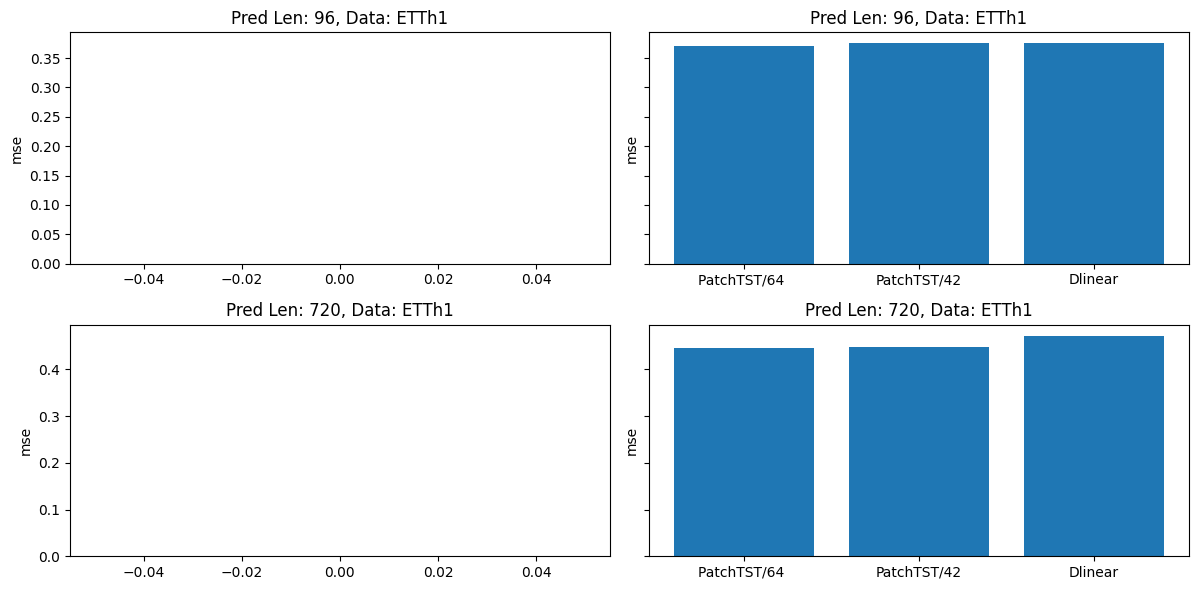

In [7]:
pred_len_list = [96, 720]
data_path_list = ["ETTh1"]

fig, axs = plt.subplots(len(pred_len_list)*len(data_path_list), 2, figsize=(12, 6), sharey='row')

#df_ref = df_ref[(df_ref['data_path'] == "ETTh1")]

for i, pred_len in enumerate(pred_len_list):
    for j, data_path in enumerate(data_path_list):
        df_filtered = df_hpo[(df_hpo['pred_len'] == pred_len) & (df_hpo['data_path'] == data_path)]
        axs[i * len(data_path_list) + j, 0].bar(df_filtered[hyperparam].astype(int).astype(str), df_filtered[metric])
        axs[i * len(data_path_list) + j, 0].set_title(f'Pred Len: {pred_len}, Data: {data_path}')
        axs[i * len(data_path_list) + j, 0].set_ylabel(metric)
        
        df_filtered = df_ref[(df_ref['pred_len'] == str(pred_len)) & (df_ref['data_path'] == data_path)]    # str(pred_len) to match the type in df_ref, "Avg"...
        axs[i * len(data_path_list) + j, 1].bar(df_filtered["model"], df_filtered[metric])
        axs[i * len(data_path_list) + j, 1].set_title(f'Pred Len: {pred_len}, Data: {data_path}')
        axs[i * len(data_path_list) + j, 1].set_ylabel(metric)

plt.tight_layout()
plt.show()

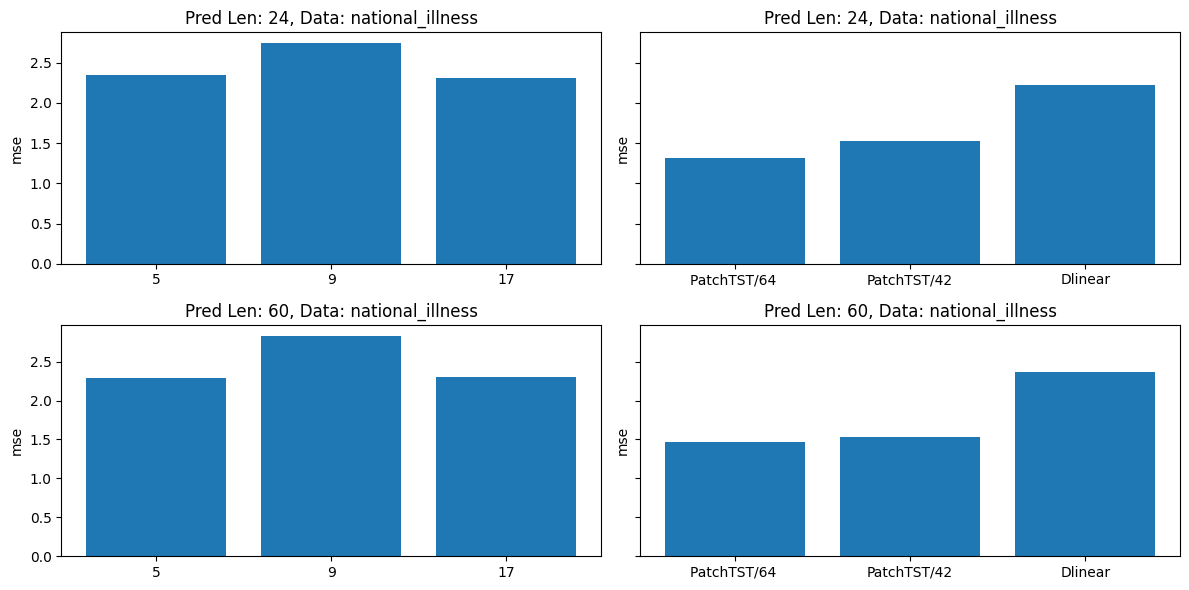

In [8]:
pred_len_list = [24, 60]
data_path_list = ["national_illness"]

fig, axs = plt.subplots(len(pred_len_list)*len(data_path_list), 2, figsize=(12, 6), sharey='row')

#df_ref = df_ref[(df_ref['data_path'] == "ETTh1")]

for i, pred_len in enumerate(pred_len_list):
    for j, data_path in enumerate(data_path_list):
        df_filtered = df_hpo[(df_hpo['pred_len'] == pred_len) & (df_hpo['data_path'] == data_path)]
        axs[i * len(data_path_list) + j, 0].bar(df_filtered[hyperparam].astype(int).astype(str), df_filtered[metric])
        axs[i * len(data_path_list) + j, 0].set_title(f'Pred Len: {pred_len}, Data: {data_path}')
        axs[i * len(data_path_list) + j, 0].set_ylabel(metric)
        
        df_filtered = df_ref[(df_ref['pred_len'] == str(pred_len)) & (df_ref['data_path'] == data_path)]    # str(pred_len) to match the type in df_ref, "Avg"...
        axs[i * len(data_path_list) + j, 1].bar(df_filtered["model"], df_filtered[metric])
        axs[i * len(data_path_list) + j, 1].set_title(f'Pred Len: {pred_len}, Data: {data_path}')
        axs[i * len(data_path_list) + j, 1].set_ylabel(metric)

plt.tight_layout()
plt.show()